In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Reto%2002/wine-challenge.csv")
df.info

<bound method DataFrame.info of     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Color_Intensity
0     14.23        1.71  2.43          15.6        127             5.64
1     13.20        1.78  2.14          11.2        100             4.38
2     13.16        2.36  2.67          18.6        101             5.68
3     14.37        1.95  2.50          16.8        113             7.80
4     13.24        2.59  2.87          21.0        118             4.32
..      ...         ...   ...           ...        ...              ...
94    11.79        2.13  2.78          28.5         92             3.00
95    12.37        1.63  2.30          24.5         88             2.12
96    12.04        4.30  2.38          22.0         80             2.60
97    12.86        1.35  2.32          18.0        122             4.10
98    12.88        2.99  2.40          20.0        104             5.40

[99 rows x 6 columns]>

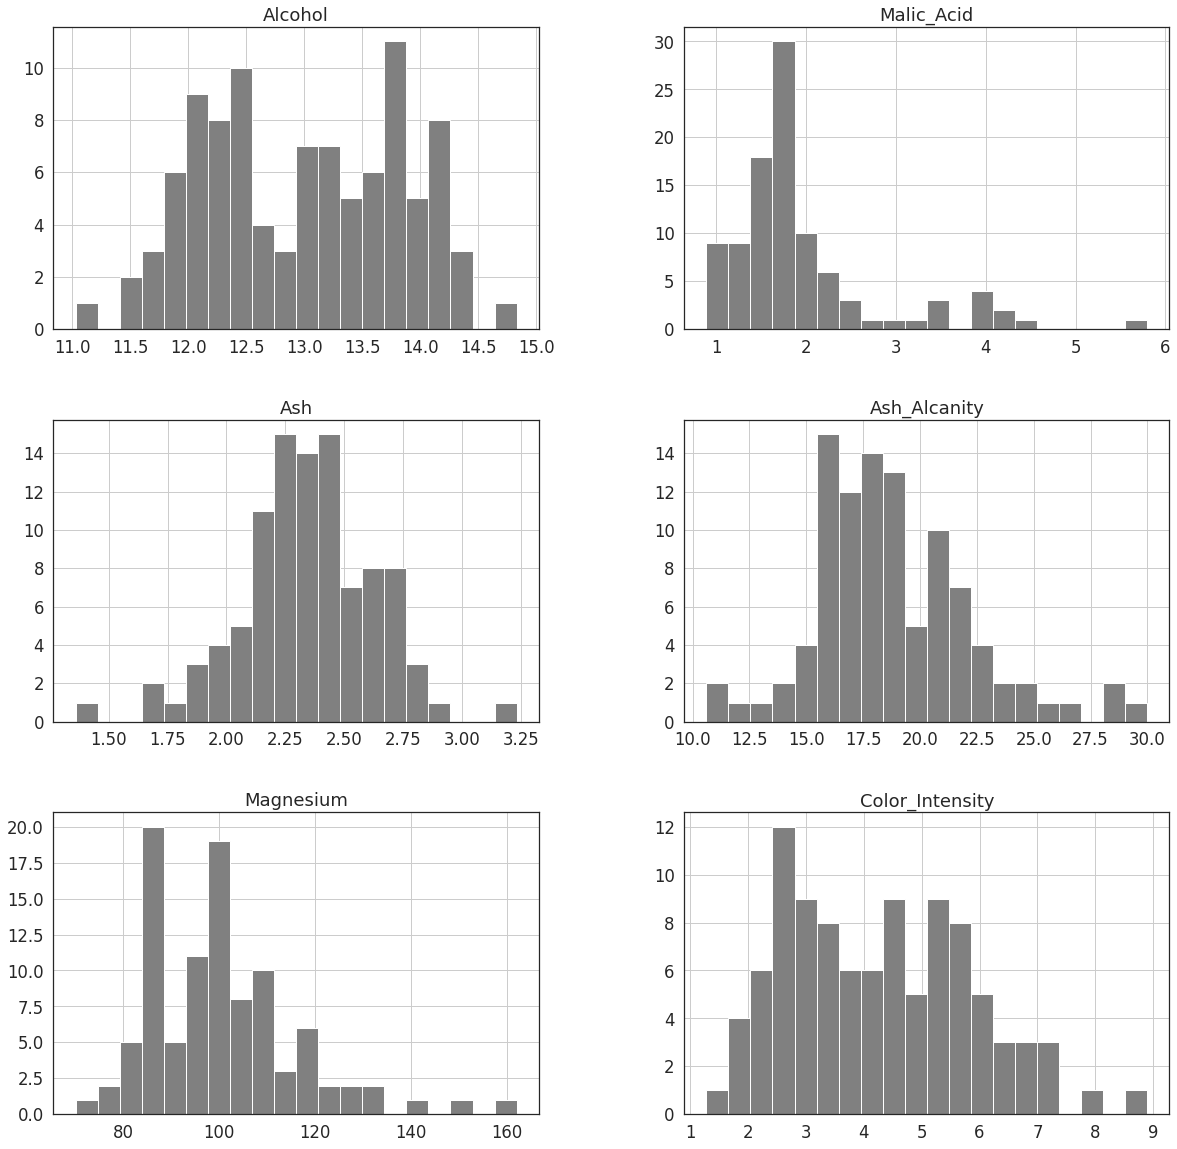

In [3]:
sns.set(style='white', font_scale=1.5, rc={"figure.figsize":(20,20)})
ax = df.hist(bins=20, color="gray")


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
std_scaler = StandardScaler()
data_cluster = df.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

In [6]:
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,2.189607e-16,-2.736307e-16,2.596128e-16,1.233581e-16,1.561602e-16,-1.110223e-16
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00
min,-2.270530e+00,-1.209714e+00,-3.506035e+00,-2.360743e+00,-1.946823e+00,-1.870077e+00
25%,-8.073595e-01,-5.190859e-01,-5.190579e-01,-6.403474e-01,-7.946350e-01,-8.512133e-01
50%,7.518778e-02,-2.813288e-01,-7.190569e-02,-2.210914e-01,-1.545303e-01,-2.159956e-03
75%,8.822541e-01,1.092722e-01,5.898796e-01,6.174205e-01,4.855743e-01,7.305416e-01
max,2.142206e+00,4.349274e+00,3.183362e+00,3.248613e+00,3.942139e+00,2.922357e+00


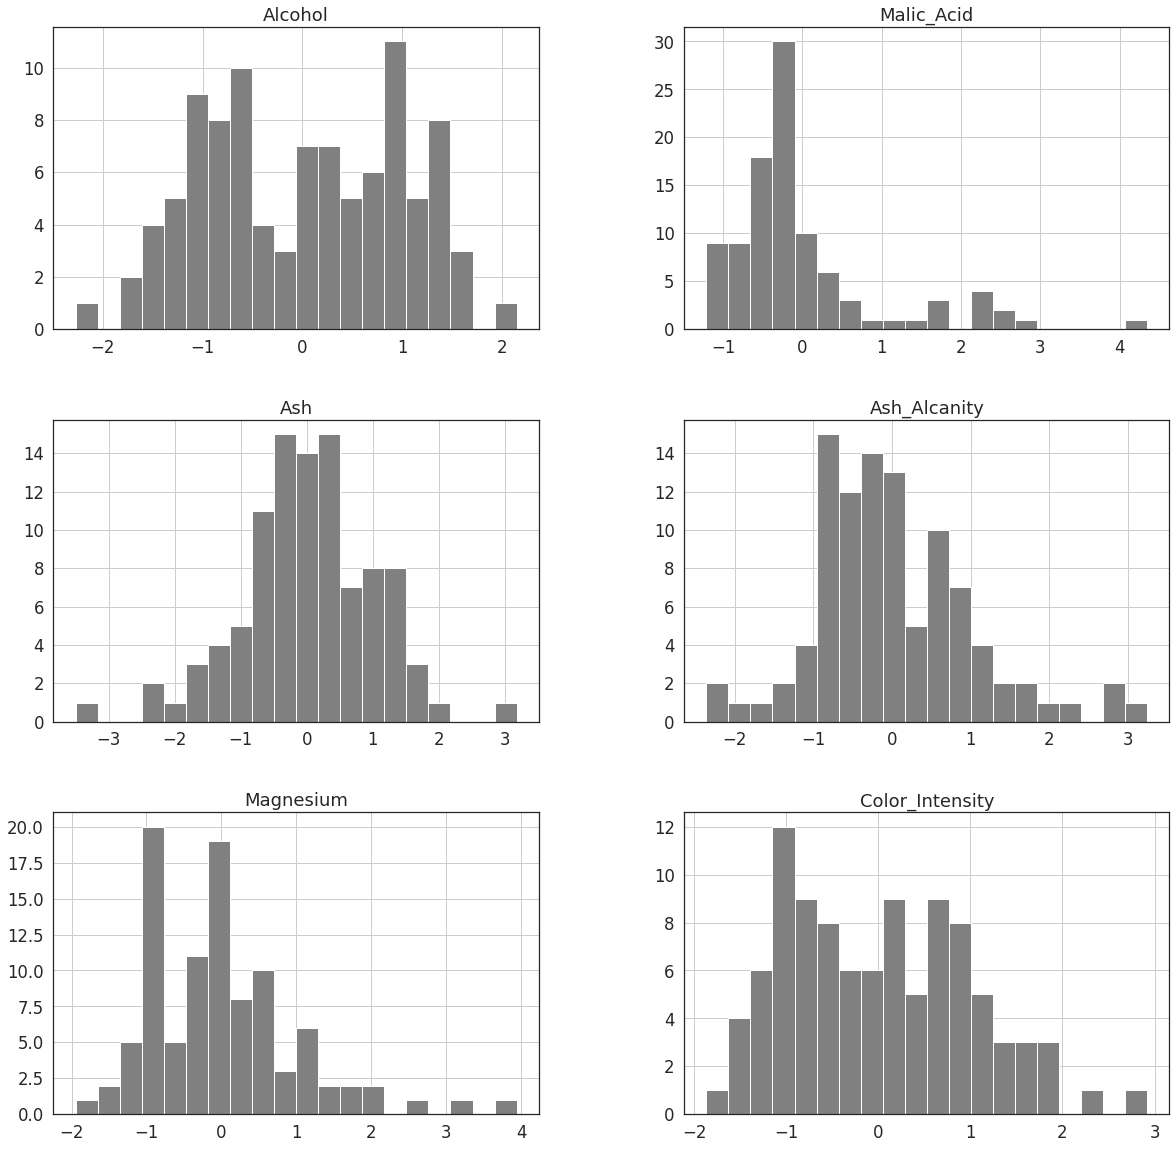

In [7]:
ax = data_cluster.hist(bins=20, color="gray")


In [8]:
from sklearn.decomposition import PCA

pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)


In [9]:
print("Varianza acumulada explicada por mis dos nuevas variables: {:.2%}".format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por mis dos nuevas variables: 62.66%


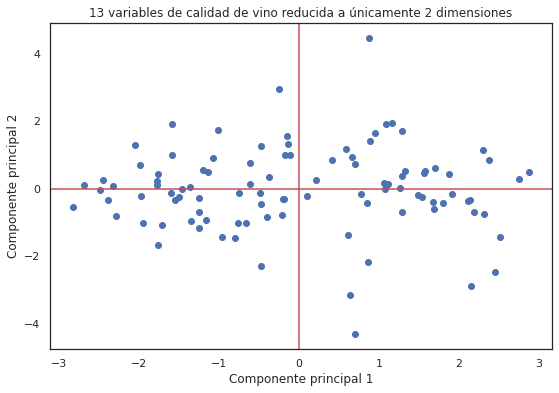

In [15]:
sns.set(style="white",rc={"figure.figsize":(9,6)})
plt.scatter(x=pca_2_resultados[:,0],y=pca_2_resultados[:,1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('13 variables de calidad de vino reducida a únicamente 2 dimensiones')
plt.axhline(0,color='r')
plt.axvline(0,color='r')

In [18]:
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster


In [20]:
inertia = []
for i in range(1,10):
    kmeans = cluster.KMeans(n_clusters= i, init='k-means++', random_state=18)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

In [24]:
# Generación del método confirmatorio: método de la silueta

silueta = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',n_init=15,max_iter=500,random_state=18)
    kmeans.fit(data_cluster)
    silueta[i] = silhouette_score(data_cluster,kmeans.labels_,metric='euclidean')

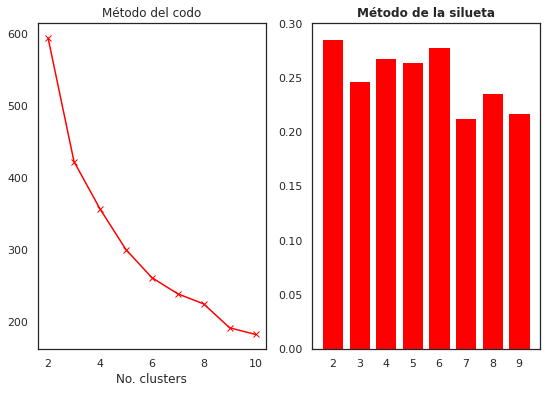

In [28]:
plt.subplot(1,2,1)

plt.plot(range(2,len(inertia)+2),inertia,marker='x',color='red')
plt.xlabel('No. clusters')
plt.title('Método del codo')

plt.subplot(1,2,2)

plt.bar(range(len(silueta)),list(silueta.values()),align="center",color='red')
plt.xticks(range(len(silueta)), list(silueta.keys()))
# plt.xlabel('No. clusters')
plt.title('Método de la silueta', fontweight ="bold")
plt.show()

In [33]:
centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)

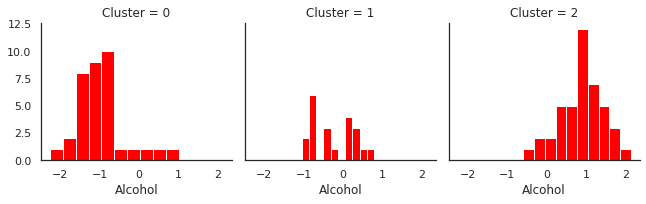

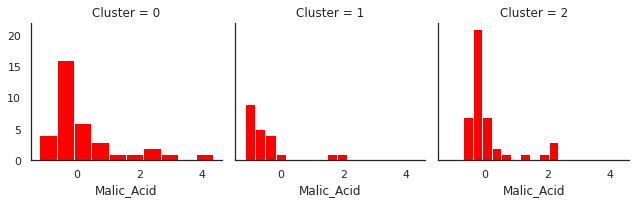

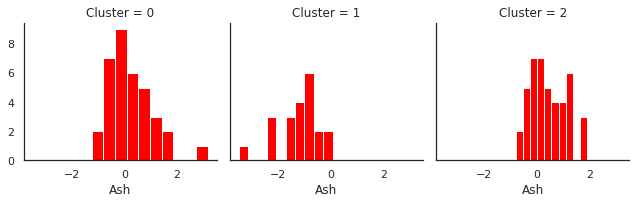

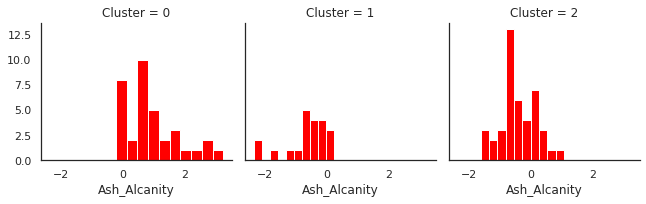

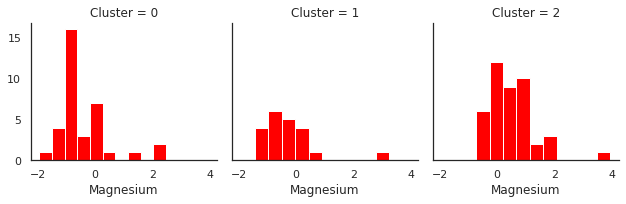

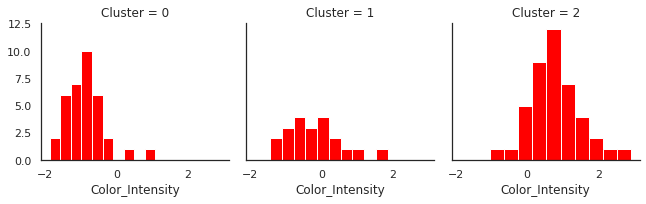

In [31]:
kmeans = cluster.KMeans(n_clusters= 3, random_state=84, init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

data2 = data_cluster.copy()
data2['Cluster'] = kmeans_labels

aux = data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(data2,col="Cluster")
    grid.map(plt.hist,cluster,color='red')

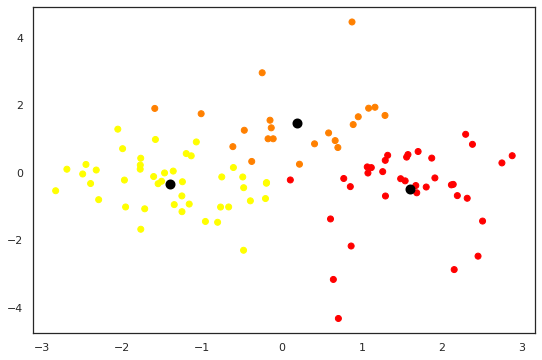

In [34]:
sns.set(style='white', rc={'figure.figsize':(9,6)})
plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels,cmap="autumn")
plt.scatter(centroides_pca[:,0],centroides_pca[:,1], marker='o',color='black',linewidths=4,zorder=10)